# Genre recognition: experiment

Goal: Assess which distance metric is the more stable.

Conclusion: `euclidean` is less stable but can potentially lead to better results.

Observations:
* All the `dm` leads to approximately the same accuracy.
* `euclidean` is less stable, its accuracy changed by 1.5% between two runs.

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'dm'
Pvalues = 2 * ['cosine_sim','euclidean','cosine_dist']

# Regenerate the graph or the features at each iteration.
regen_graph = True
regen_features = True
regen_baseline = False

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['data_scaling_graph'] = 'features'
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'euclidean'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0.1

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['test_size'] = 0.1
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph, dm = cosine_sim -------------------- 

Data: (149000, 96), float32
Elapsed time: 523.94 seconds
All self-referenced in the first column: True
dist in [0.66959297657, 1.0]
w in [0.66959297657, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2430692,), float32
  L_indices : (2430692,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2430692,), float32
  W_indices : (2430692,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine_sim
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 533.73 seconds

 -------------------- Features, dm = cosine_sim -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,

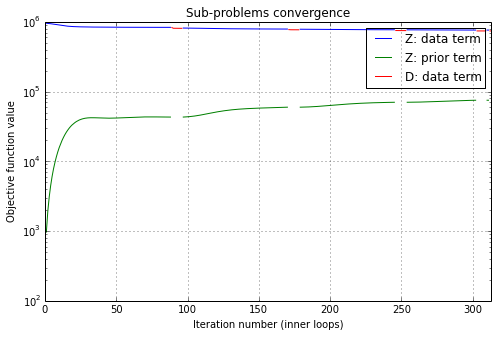

Inner loop: 314 iterations
g(Z) = ||X-DZ||_2^2 = 7.391266e+05
rdiff: 0.000265621767921
i(Z) = ||Z||_1 = 7.507485e+04
j(Z) = tr(Z^TLZ) = 2.182541e+04


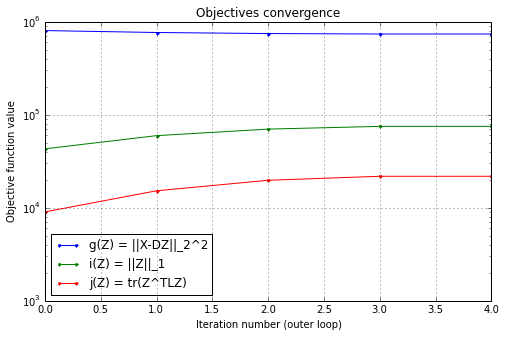

Global objective: 8.360269e+05


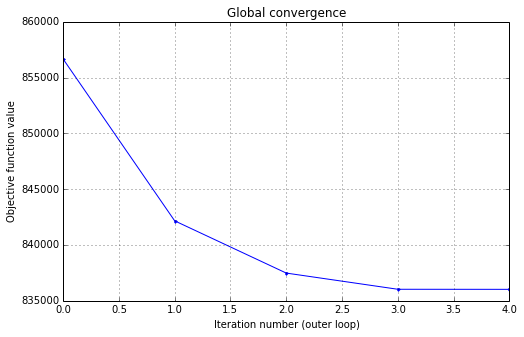

Outer loop: 5 iterations

Z in [-0.052473615855, 0.141105085611]
Sparsity of Z: 8,656,904 non-zero entries out of 19,072,000 entries, i.e. 45.4%.


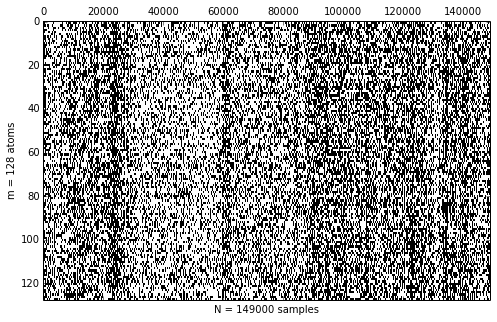

D in [-0.149452388287, 0.568888425827]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


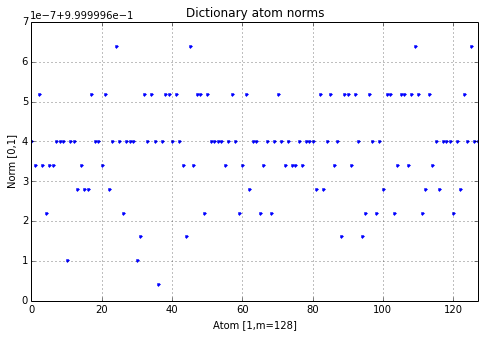

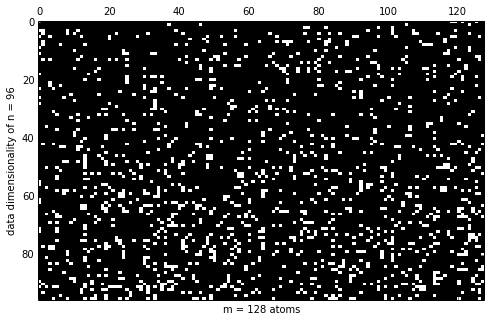

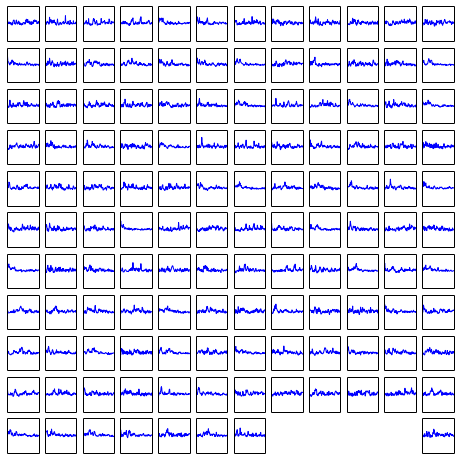

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 787 seconds

 -------------------- Classification, dm = cosine_sim -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000

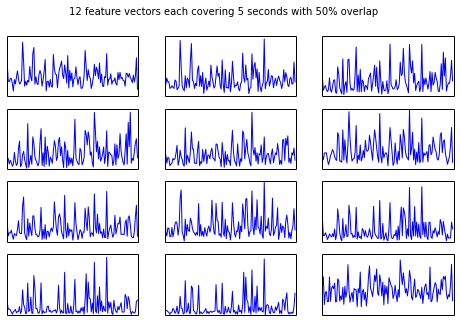

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 56.6 %
Clips accuracy: 58.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  63 (+/- 1.4) <- [63 62 64 63 61 63 63 66 64 61]
  64 (+/- 2.0) <- [64 65 63 61 65 65 61 59 63 65]
  66 (+/- 2.2) <- [65 66 67 64 68 67 67 61 66 62]
  64 (+/- 2.5) <- [65 59 65 63 60 66 66 62 62 67]
  64 (+/- 1.1) <- [63 64 63 66 65 65 63 64 63 62]
  64 (+/- 1.2) <- [63 64 63 65 65 65 66 63 62 63]
  64 (+/- 1.8) <- [64 63 65 65 65 59 63 62 62 63]
  63 (+/- 2.0) <- [61 62 64 66 63 67 62 61 62 62]
  64 (+/- 1.3) <- [6

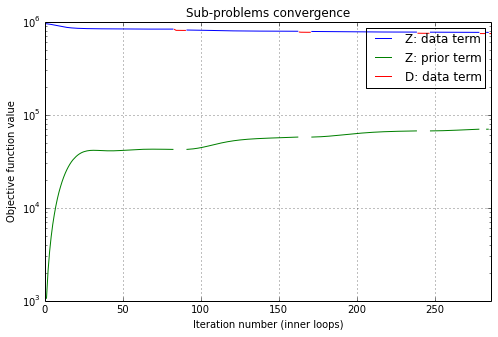

Inner loop: 287 iterations
g(Z) = ||X-DZ||_2^2 = 7.469461e+05
rdiff: 0.000393581782487
i(Z) = ||Z||_1 = 7.001193e+04
j(Z) = tr(Z^TLZ) = 2.276549e+04


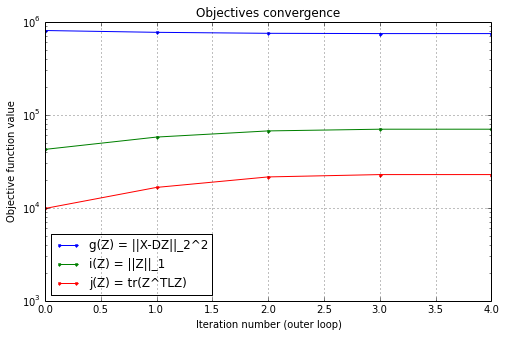

Global objective: 8.397235e+05


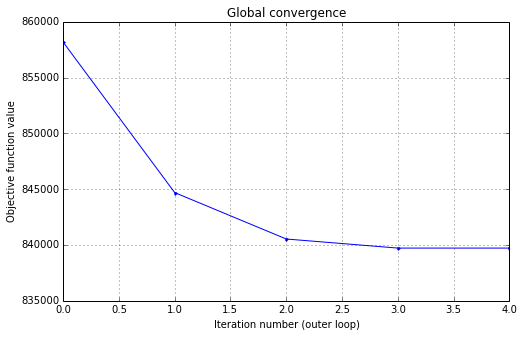

Outer loop: 5 iterations

Z in [-0.101718649268, 0.194122523069]
Sparsity of Z: 8,337,151 non-zero entries out of 19,072,000 entries, i.e. 43.7%.


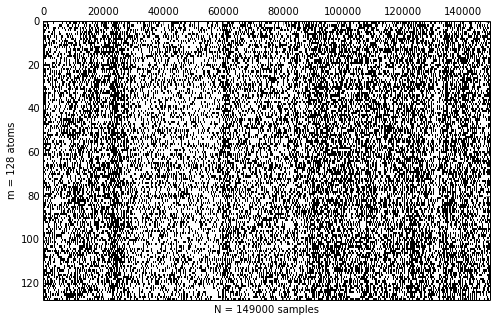

D in [-0.142467901111, 0.522177219391]
d in [0.999999701977, 1.00000023842]
Constraints on D: True


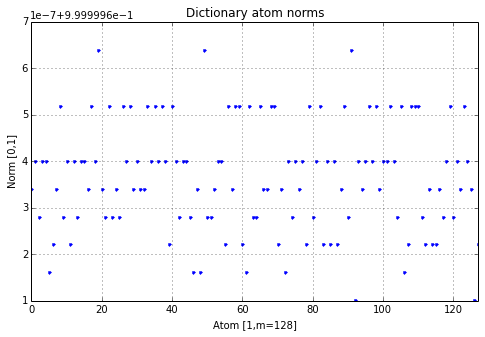

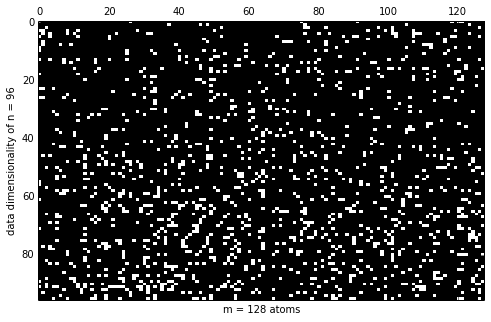

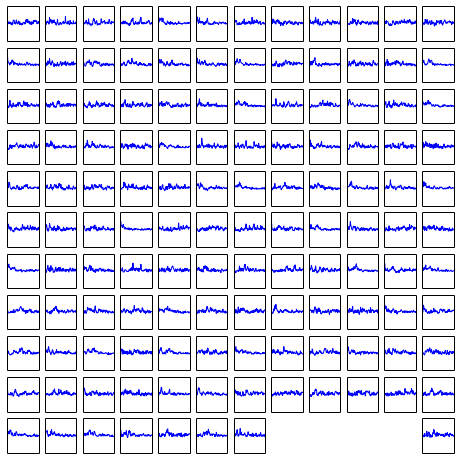

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 779 seconds

 -------------------- Classification, dm = euclidean -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 

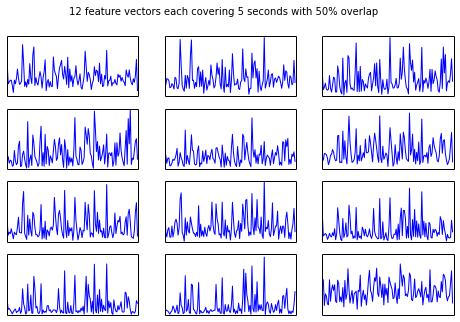

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.0 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 57.2 %
Clips accuracy: 60.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  63 (+/- 1.9) <- [63 63 62 62 59 64 62 65 66 60]
  64 (+/- 2.1) <- [65 65 63 61 67 65 61 60 63 64]
  65 (+/- 2.0) <- [64 65 66 64 66 67 67 60 65 62]
  64 (+/- 2.3) <- [65 60 64 63 60 66 66 62 63 66]
  64 (+/- 1.6) <- [62 64 63 67 64 64 62 64 62 60]
  64 (+/- 1.0) <- [63 64 63 66 63 64 64 62 62 63]
  64 (+/- 1.6) <- [64 64 63 64 65 59 65 63 63 63]
  63 (+/- 1.6) <- [60 63 63 63 61 66 61 61 63 61]
  64 (+/- 1.6) <- [6

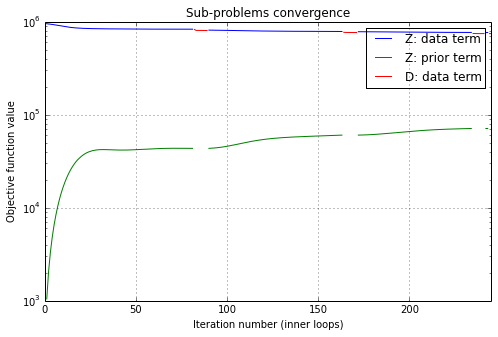

Inner loop: 246 iterations
g(Z) = ||X-DZ||_2^2 = 7.462377e+05
rdiff: 0.000593498029647
i(Z) = ||Z||_1 = 7.127560e+04
j(Z) = tr(Z^TLZ) = 2.056625e+04


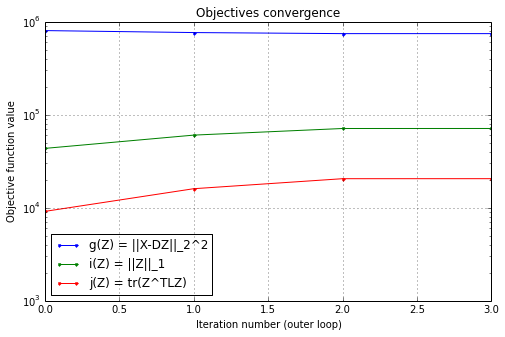

Global objective: 8.380796e+05


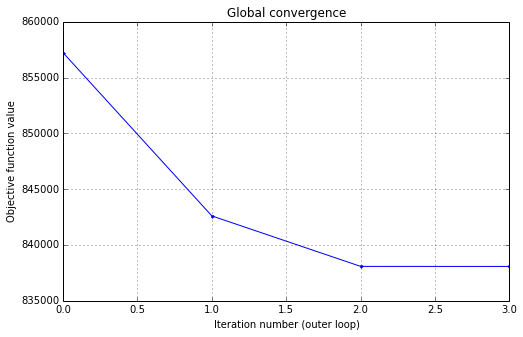

Outer loop: 4 iterations

Z in [-0.056636184454, 0.14264112711]
Sparsity of Z: 8,786,613 non-zero entries out of 19,072,000 entries, i.e. 46.1%.


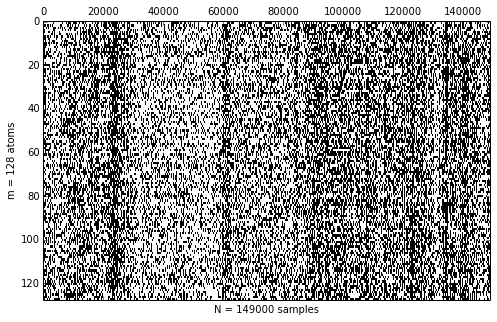

D in [-0.145910441875, 0.507630586624]
d in [0.999999761581, 1.00000023842]
Constraints on D: True


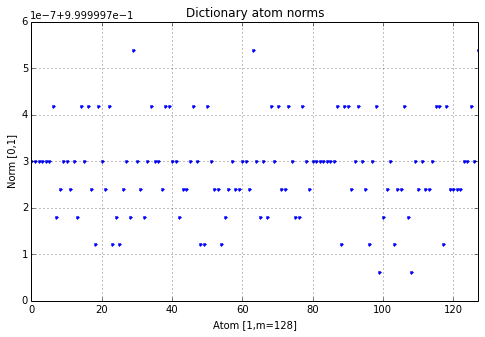

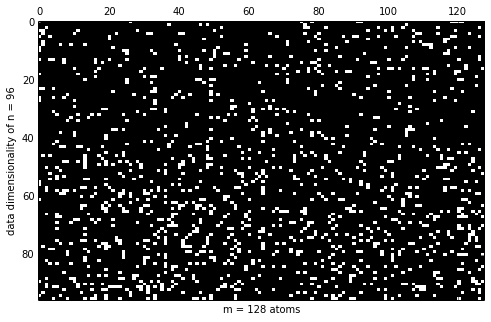

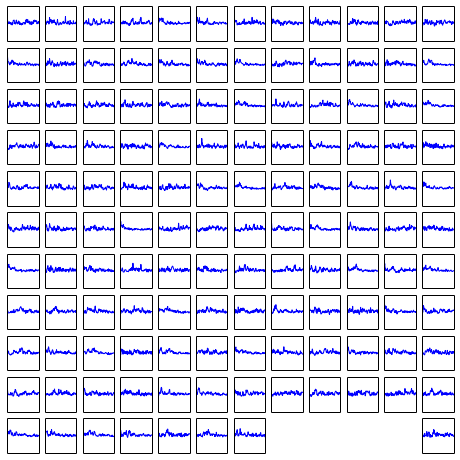

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 667 seconds

 -------------------- Classification, dm = cosine_dist -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,00

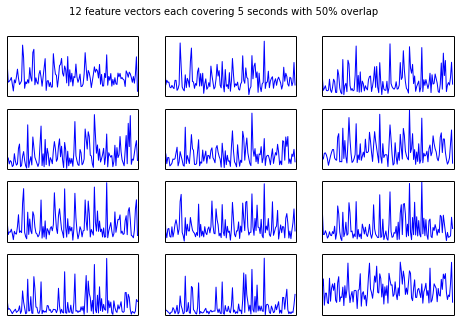

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 57.2 %
Clips accuracy: 62.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  63 (+/- 2.0) <- [63 63 62 61 59 63 62 65 66 60]
  64 (+/- 1.8) <- [65 65 63 61 64 65 61 61 64 65]
  66 (+/- 1.9) <- [65 66 67 64 66 67 66 62 66 62]
  64 (+/- 2.1) <- [64 60 63 62 60 66 66 62 63 65]
  64 (+/- 1.5) <- [62 64 64 65 63 64 62 65 62 61]
  64 (+/- 1.1) <- [63 63 63 64 62 64 66 63 62 64]
  64 (+/- 1.8) <- [65 64 64 64 65 58 63 63 62 64]
  64 (+/- 1.5) <- [62 63 64 65 63 67 62 62 63 62]
  64 (+/- 1.6) <- [6

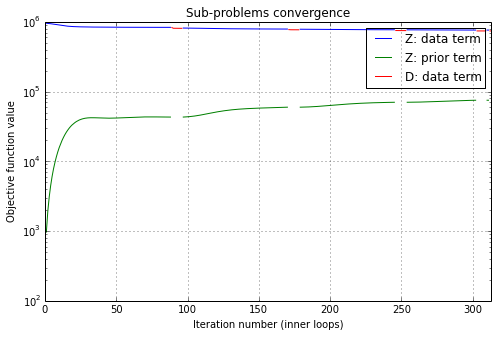

Inner loop: 314 iterations
g(Z) = ||X-DZ||_2^2 = 7.391266e+05
rdiff: 0.000265621767921
i(Z) = ||Z||_1 = 7.507485e+04
j(Z) = tr(Z^TLZ) = 2.182541e+04


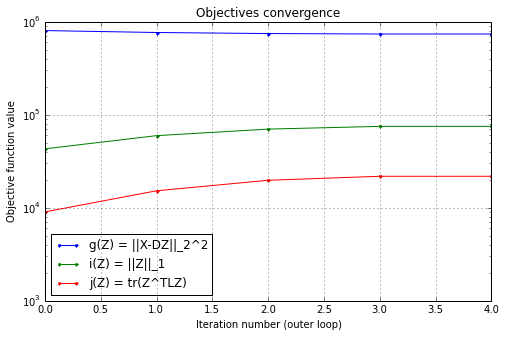

Global objective: 8.360269e+05


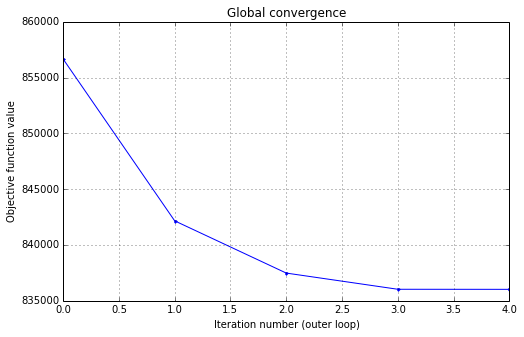

Outer loop: 5 iterations

Z in [-0.052473615855, 0.141105085611]
Sparsity of Z: 8,656,904 non-zero entries out of 19,072,000 entries, i.e. 45.4%.


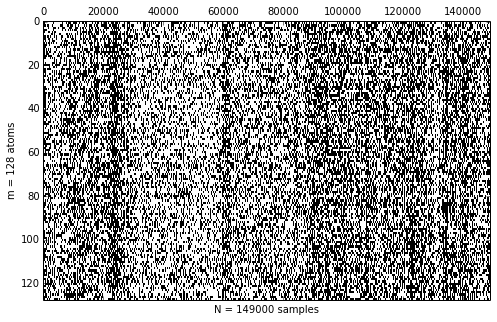

D in [-0.149452388287, 0.568888425827]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


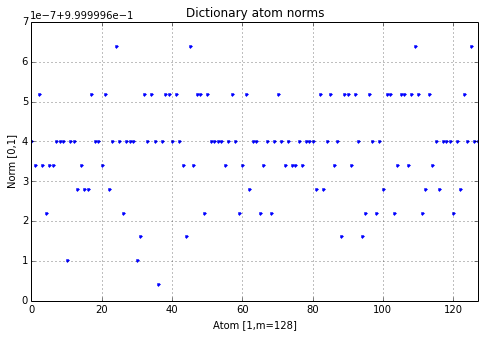

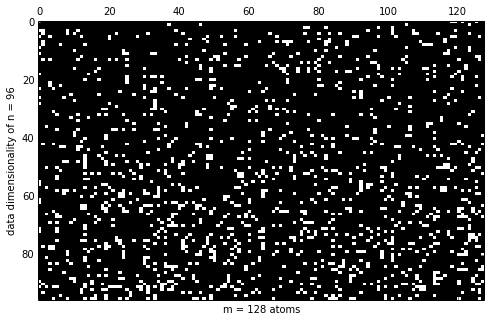

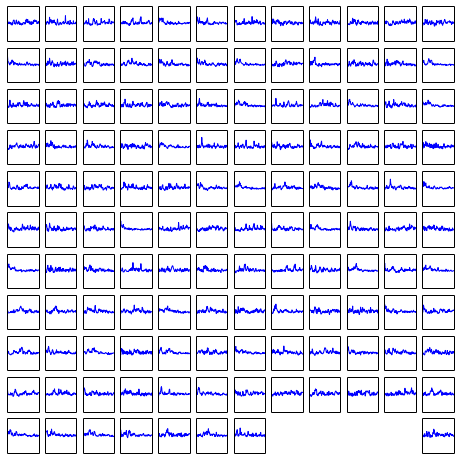

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 817 seconds

 -------------------- Classification, dm = cosine_sim -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000

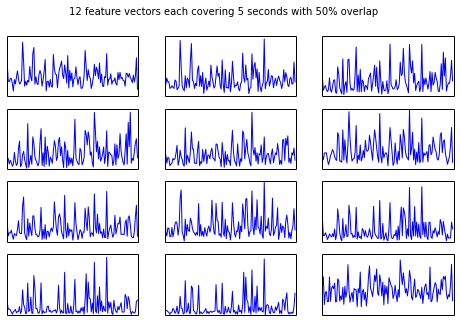

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 56.6 %
Clips accuracy: 58.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  63 (+/- 1.4) <- [63 62 64 63 61 63 63 66 64 61]
  64 (+/- 2.0) <- [64 65 63 61 65 65 61 59 63 65]
  66 (+/- 2.2) <- [65 66 67 64 68 67 67 61 66 62]
  64 (+/- 2.5) <- [65 59 65 63 60 66 66 62 62 67]
  64 (+/- 1.1) <- [63 64 63 66 65 65 63 64 63 62]
  64 (+/- 1.2) <- [63 64 63 65 65 65 66 63 62 63]
  64 (+/- 1.8) <- [64 63 65 65 65 59 63 62 62 63]
  63 (+/- 2.0) <- [61 62 64 66 63 67 62 61 62 62]
  64 (+/- 1.3) <- [6

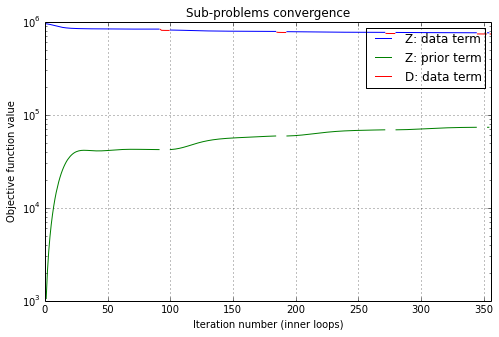

Inner loop: 357 iterations
g(Z) = ||X-DZ||_2^2 = 7.395080e+05
rdiff: 0.000191850515487
i(Z) = ||Z||_1 = 7.341332e+04
j(Z) = tr(Z^TLZ) = 2.210159e+04


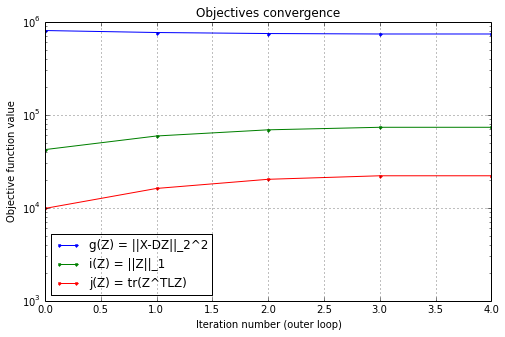

Global objective: 8.350230e+05


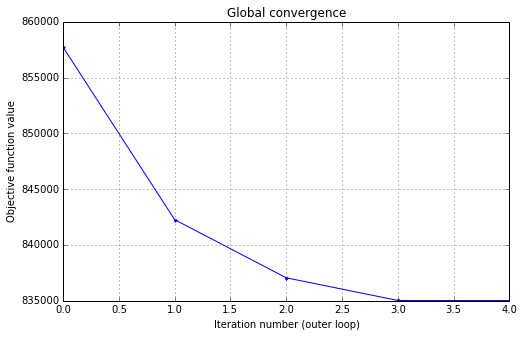

Outer loop: 5 iterations

Z in [-0.100512064993, 0.248378291726]
Sparsity of Z: 8,152,165 non-zero entries out of 19,072,000 entries, i.e. 42.7%.


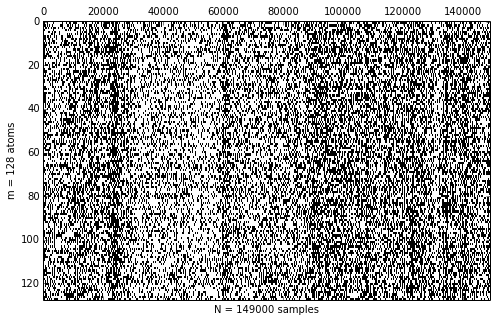

D in [-0.139279812574, 0.677405714989]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


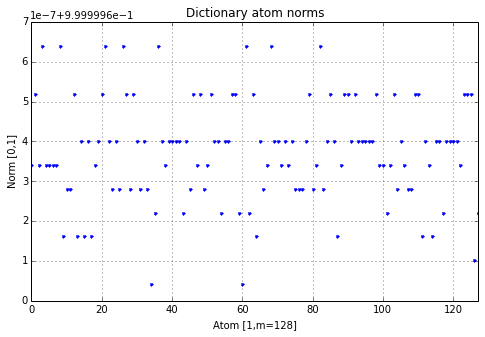

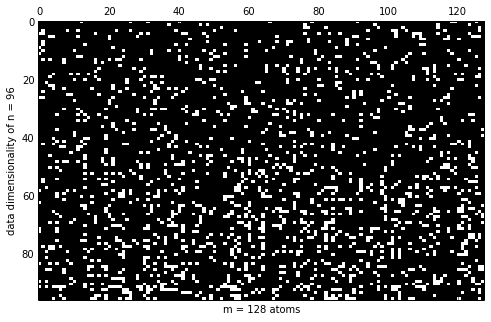

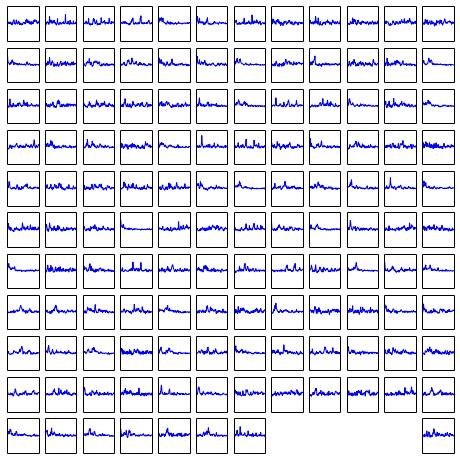

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 956 seconds

 -------------------- Classification, dm = euclidean -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 

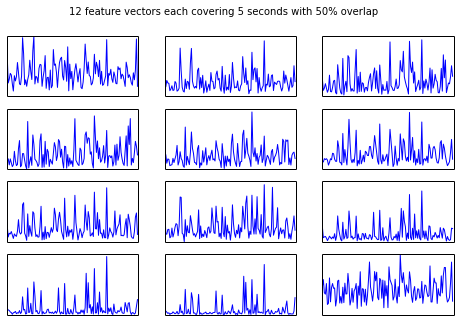

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 65.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 58.9 %
Clips accuracy: 64.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  65 (+/- 1.9) <- [63 64 66 66 63 67 63 68 66 63]
  66 (+/- 1.5) <- [67 66 66 64 67 67 63 64 64 66]
  68 (+/- 2.4) <- [66 69 69 66 69 71 70 63 68 64]
  66 (+/- 2.6) <- [66 60 66 64 63 68 69 66 64 69]
  66 (+/- 1.0) <- [66 65 65 68 68 66 65 65 66 65]
  67 (+/- 1.1) <- [65 67 65 66 66 67 68 66 65 66]
  66 (+/- 1.3) <- [66 66 66 66 66 62 66 65 66 65]
  66 (+/- 1.5) <- [65 64 65 67 65 68 65 66 65 62]
  66 (+/- 1.2) <- [6

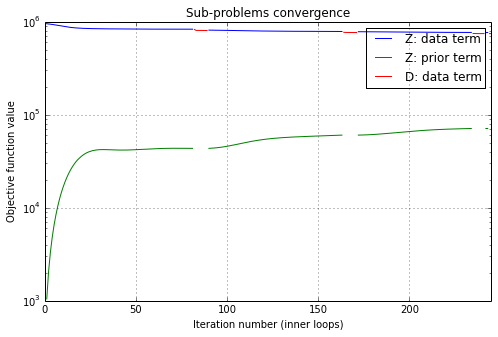

Inner loop: 246 iterations
g(Z) = ||X-DZ||_2^2 = 7.462377e+05
rdiff: 0.000593498029647
i(Z) = ||Z||_1 = 7.127560e+04
j(Z) = tr(Z^TLZ) = 2.056625e+04


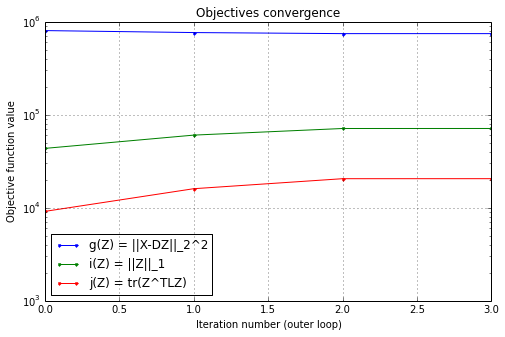

Global objective: 8.380796e+05


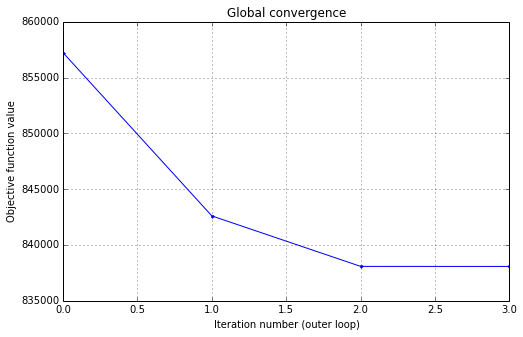

Outer loop: 4 iterations

Z in [-0.056636184454, 0.14264112711]
Sparsity of Z: 8,786,613 non-zero entries out of 19,072,000 entries, i.e. 46.1%.


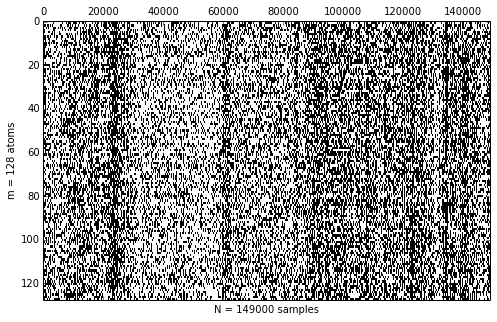

D in [-0.145910441875, 0.507630586624]
d in [0.999999761581, 1.00000023842]
Constraints on D: True


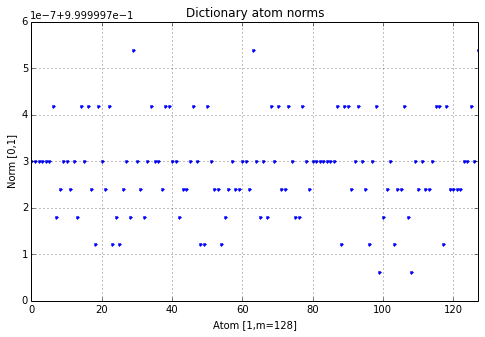

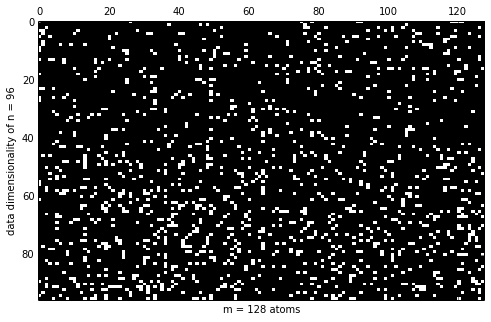

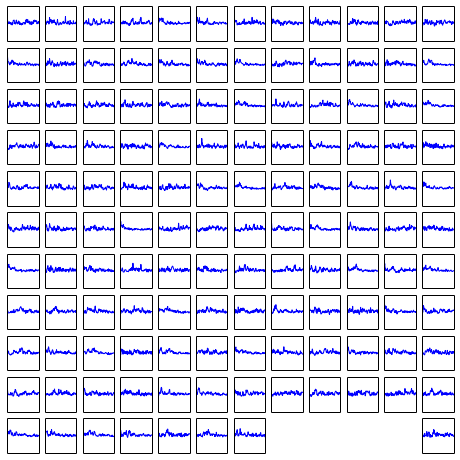

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 661 seconds

 -------------------- Classification, dm = cosine_dist -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,00

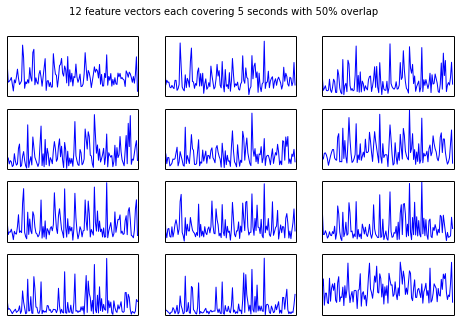

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 57.2 %
Clips accuracy: 62.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  63 (+/- 2.0) <- [63 63 62 61 59 63 62 65 66 60]
  64 (+/- 1.8) <- [65 65 63 61 64 65 61 61 64 65]
  66 (+/- 1.9) <- [65 66 67 64 66 67 66 62 66 62]
  64 (+/- 2.1) <- [64 60 63 62 60 66 66 62 63 65]
  64 (+/- 1.5) <- [62 64 64 65 63 64 62 65 62 61]
  64 (+/- 1.1) <- [63 63 63 64 62 64 66 63 62 64]
  64 (+/- 1.8) <- [65 64 64 64 65 58 63 63 62 64]
  64 (+/- 1.5) <- [62 63 64 65 63 67 62 62 63 62]
  64 (+/- 1.6) <- [6

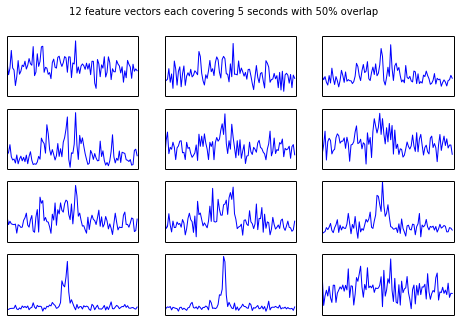

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 59.3 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 54.8 %
Clips accuracy: 62.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  58 (+/- 1.8) <- [57 56 61 57 53 59 57 59 57 56]
  59 (+/- 2.0) <- [59 61 58 57 60 56 60 57 57 64]
  60 (+/- 2.0) <- [60 62 60 58 59 62 62 57 60 56]
  57 (+/- 2.2) <- [57 51 57 57 56 59 57 58 56 59]
  59 (+/- 2.1) <- [61 57 60 59 57 63 59 61 59 55]
  59 (+/- 1.6) <- [59 61 58 61 60 59 57 60 56 60]
  59 (+/- 1.7) <- [62 56 57 59 57 56 59 59 59 58]
  58 (+/- 1.4) <- [57 58 56 56 58 61 60 57 58 57]
  58 (+/- 2.6) <- [60 5

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if regen_baseline:
    res['baseline'] = []
    res['baseline_std'] = []
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
        res['baseline'].append(accuracy)
        res['baseline_std'].append(accuracy_std)
else:
    separator('Baseline')
    %run audio_classification.ipynb
    res['baseline'] = len(Pvalues) * [accuracy]
    res['baseline_std'] = accuracy_std

## Results

dm = ['cosine_sim', 'euclidean', 'cosine_dist', 'cosine_sim', 'euclidean', 'cosine_dist']
res['accuracy_std'] = [1.9028042171723516, 1.8752331336544679, 1.8835921651048679, 1.9028042171723516, 1.852325115451749, 1.8835921651048679]
res['objective_j'] = [21825.411987304688, 22765.493774414062, 20566.252136230469, 21825.411987304688, 22101.589965820312, 20566.252136230469]
res['objective_i'] = [75074.8515625, 70011.9296875, 71275.6015625, 75074.8515625, 73413.3203125, 71275.6015625]
res['objective_h'] = [0, 0, 0, 0, 0, 0]
res['objective_g'] = [739126.640625, 746946.09375, 746237.734375, 739126.640625, 739508.046875, 746237.734375]
res['baseline'] = [58.794999999999995, 58.794999999999995, 58.794999999999995, 58.794999999999995, 58.794999999999995, 58.794999999999995]
res['time_features'] = [778.8208689689636, 769.245001077652, 656.6257529258728, 805.0615928173065, 943.803286075592, 647.862753868103]
res['baseline_std'] = 1.89807724348
res['sparsity'] = [45.39064597315436, 43.714088716442

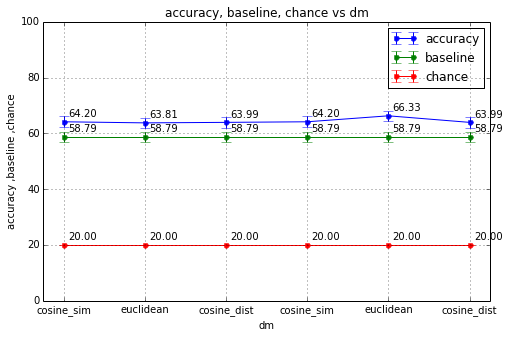

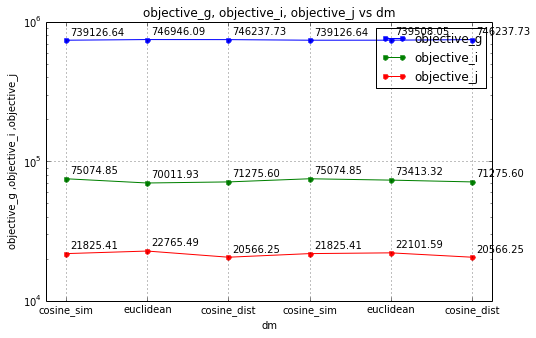

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


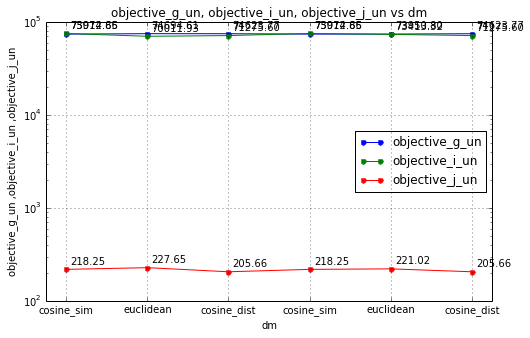

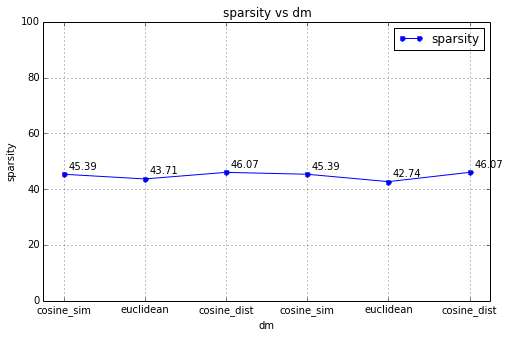

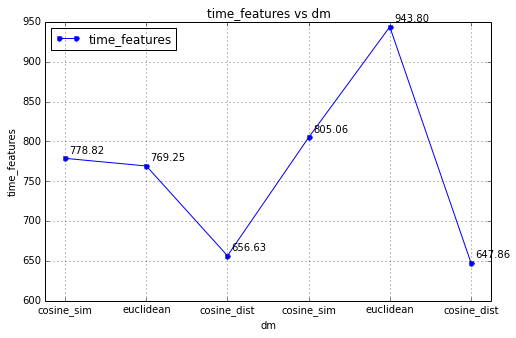

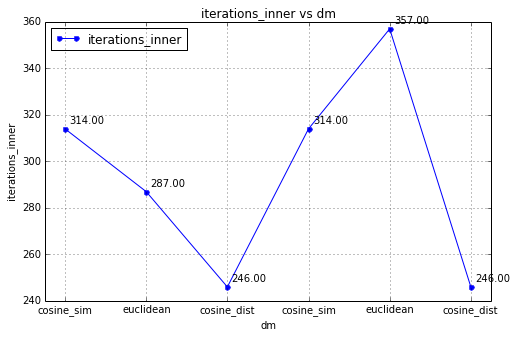

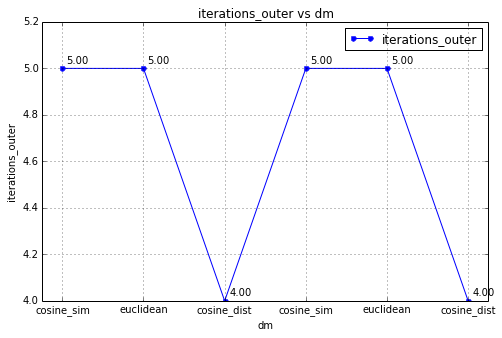

Dictionary atoms for dm = cosine_sim
Dictionary atoms for dm = euclidean
Dictionary atoms for dm = cosine_dist
Dictionary atoms for dm = cosine_sim
Dictionary atoms for dm = euclidean
Dictionary atoms for dm = cosine_dist
Experiment time: 12479 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))